Mixed variables are those which values contain both numbers and labels

Type 1: 

Some mixed variables, will contain among their values either strings or numbers, but not the 2 together. This means that the value of an observation is either a string, or a number, but not a string and a number.

Type 2: 

The variable will contain strings and numbers together for the same observation. After inspecting the variable, we can decide whether we should treat these types as categorical variables, or whether it will be more predictive if we separate the categorical and the numerical parts 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\loan.csv', usecols=['id','open_il_24m'])
indeces_b = data[data.open_il_24m.isnull()].sample(100000, random_state=44).index
indeces_c = data[data.open_il_24m.isnull()].sample(300000, random_state=42).index
data.open_il_24m.fillna('A', inplace=True)
data.loc[indeces_b, 'open_il_24m']='B'
data.loc[indeces_c, 'open_il_24m']='C'

In [4]:
data.open_il_24m.unique()

array([2.0, 3.0, 5.0, 1.0, 0.0, 4.0, 6.0, 7.0, 9.0, 12.0, 8.0, 10.0, 11.0,
       19.0, 15.0, 14.0, 13.0, 17.0, 16.0, 18.0, 20.0, 26.0, 22.0, 21.0,
       23.0, 39.0, 31.0, 24.0, 28.0, 51.0, 30.0, 'C', 'A', 'B'],
      dtype=object)

Text(0, 0.5, 'Number of borrowers')

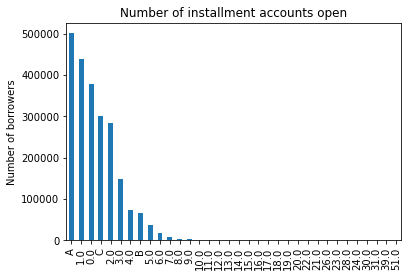

In [5]:
fig = data.open_il_24m.value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')

In [8]:
data['open_il_24m_numerical'] = np.where(data.open_il_24m.str.isdigit(), data.open_il_24m, np.nan)
data['open_il_24m_categorical'] = np.where(data.open_il_24m.str.isdigit(), np.nan, data.open_il_24m,)

data.head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,NaN,2,2,NaN
1,NaN,3,3,NaN
2,NaN,2,2,NaN
3,NaN,5,5,NaN
4,NaN,5,5,NaN


In [9]:
data.dropna(subset = ['open_il_24m_numerical'], axis=0)

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,NaN,2,2,NaN
1,NaN,3,3,NaN
2,NaN,2,2,NaN
3,NaN,5,5,NaN
4,NaN,5,5,NaN
...,...,...,...,...
2260663,NaN,1,1,NaN
2260664,NaN,1,1,NaN
2260665,NaN,2,2,NaN
2260666,NaN,3,3,NaN


In [10]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv', usecols = ['Ticket', 'Cabin', 'Survived'])
data.head()

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN


In [11]:
data['Cabin_numerical'] = data.Cabin.str.extract('(\d+)') # captures numerical part
data['Cabin_categorical'] = data['Cabin'].str[0] # captures the first letter

data[['Cabin', 'Cabin_numerical', 'Cabin_categorical']].head()

,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85,C
2,NaN,NaN,NaN
3,C123,123,C
4,NaN,NaN,NaN


In [12]:
data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [13]:
# extract the last bit of ticket as number
data['Ticket_numerical'] = data.Ticket.apply(lambda s: s.split()[-1])
data['Ticket_numerical'] = np.where(data.Ticket_numerical.str.isdigit(), data.Ticket_numerical, np.nan)

# extract the first part of ticket as category
data['Ticket_categorical'] = data.Ticket.apply(lambda s: s.split()[0])
data['Ticket_categorical'] = np.where(data.Ticket_categorical.str.isdigit(), np.nan, data.Ticket_categorical)

data[['Ticket', 'Ticket_numerical','Ticket_categorical']].head(10)

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171,A/5
1,PC 17599,17599,PC
2,STON/O2. 3101282,3101282,STON/O2.
3,113803,113803,NaN
4,373450,373450,NaN
5,330877,330877,NaN
6,17463,17463,NaN
7,349909,349909,NaN
8,347742,347742,NaN
9,237736,237736,NaN


In [14]:
print('Ticket_original no of labels: ', len(data.Ticket.unique()))
print('Cabin_original no of labels: ', len(data.Cabin.unique()))

print('Ticket_categorical no of labels: ', len(data.Ticket_categorical.unique()))
print('Cabin_categorical no of labels: ', len(data.Cabin_categorical.unique()))


Ticket_original no of labels:  681
Cabin_original no of labels:  148
Ticket_categorical no of labels:  44
Cabin_categorical no of labels:  9


Observation :number of categories are reduced with this simple pre-processing